# Gerekli Paketlerin Importlanmasi #

Veri analizi ve görselleştirme için sıkça kullanılan dört önemli kütüphaneyi projeye dahil ediyor

In [ ]:
import pandas as pd #verisetlerini pandas dataframe'ine çevirmek için
import numpy as np #veriler arasında sayısal işlemleri yapabilmek için
import matplotlib.pyplot as plt #grafik çıkarmak için
import seaborn as sns #grafik çıkarmak için

# Data Yukleme ve Duzenleme #

Pandas kütüphanesini kullanarak bir CSV (Comma-Separated Values) dosyasını Python'da bir DataFrame olarak okumak için kullanılır.

In [85]:
df = pd.read_csv('salary.csv')

 DataFrame'deki verilerin ilk 5 satırını ekrana basar. Bu, veri setinin genel yapısını hızlıca anlamak için kullanışlıdır.

In [86]:
df.head()

,Time,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary
0,2023-01-22 18:49:36.202,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL
1,2023-01-22 18:49:38.280,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL
2,2023-01-22 18:49:41.383,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL
3,2023-01-22 18:50:19.296,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL
4,2023-01-22 18:51:13.644,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL


"Time" adlı sütünunu kalıcı olarak kaldırıyoruz çünkü time sütunu ile herhangi bir işlem yapmayacağız.

In [87]:
df.drop('Time', axis=1, inplace=True)

Veri seti hakkında özet bilgi verme.(kaç tane null değer var veya kaç sütun var gibi özet bilgi sağlar)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position          1164 non-null   object
 1   Level             1164 non-null   object
 2   Experience        1164 non-null   object
 3   Technology        1164 non-null   object
 4   Location          1164 non-null   object
 5   Way_of_working    1164 non-null   object
 6   Employees_number  1164 non-null   object
 7   Salary_type       1164 non-null   object
 8   Salary            1164 non-null   object
dtypes: object(9)
memory usage: 82.0+ KB


DataFrame de 9 adaet sütun bulunmaktadır sütun sayısı ise her bir sütun için 1164 satır vardır.Tüm veri tütü object olarak tanımlanmıştır.

DataFrame deki her sütünda bulunan eksik(null) değerlerinin sayısını gösteriri.

In [89]:
df.isnull().sum()

Position            0
Level               0
Experience          0
Technology          0
Location            0
Way_of_working      0
Employees_number    0
Salary_type         0
Salary              0
dtype: int64

Maaş aralıklarını minimum ve maksimum maaş olarak ayırmak için kullanılır. Çünkü modeli eğitirken daha fazla anlamlı veri vermemiz lazım

In [90]:
df['Min_Salary'] = df['Salary'].apply(lambda x: x.split('-')[0][:-1])
df['Max_Salary'] = df["Salary"].apply(lambda x: x.split("-")[1][1:7] if len(x.split("-")) > 1  else np.nan)

In [91]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,Min_Salary,Max_Salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41.000,45.000
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51.000,55.000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16.000,20.000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41.000,45.000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11.000,15.000


Min_Salary ve Max_Salary sütunlarında bulunan binlik ayraçları kaldırmak amacıyla kullanılır. Maaşı optimum bir şekilde verebilmek için 

In [92]:
df['Min_Salary'] = df['Min_Salary'].apply(lambda x: x.replace('.',''))
df['Max_Salary'] = df['Max_Salary'].apply(lambda x: x.replace('.','') if x is not np.nan else x)

Min_Salary sütununda bulunan benzersiz (unique) değerleri listelemek için kullanılır. KUllanım amacı farklı min. maaş seviyelerinin neler olduğunu görmek.

In [93]:
df['Min_Salary'].unique()

array(['41000', '51000', '16000', '11000', '21000', '5000', '31000',
       '56000', '91000', '26000', '101000', '36000', '151000', '81000',
       '71000', '66000', '46000', '121000', '61000', '200000+ T'],
      dtype=object)

Min_Salary sütununda belirli bir formatta olan değerleri standart bir formata dönüştürmektir.

In [94]:
df['Min_Salary'] = df['Min_Salary'].apply(lambda x: '200000' if x=='200000+ T' else x)

In [95]:
df['Min_Salary'].unique()

array(['41000', '51000', '16000', '11000', '21000', '5000', '31000',
       '56000', '91000', '26000', '101000', '36000', '151000', '81000',
       '71000', '66000', '46000', '121000', '61000', '200000'],
      dtype=object)

In [96]:
df['Max_Salary'].unique()

array(['45000', '55000', '20000', '15000', '25000', '10000', '35000',
       '60000', '30000', '12000', '40000', '90000', '80000', '70000',
       '50000', '65000', nan], dtype=object)

Max_Salary sütunundaki eksik (null) değerleri doldurmak amacıyla Min_Salary sütunundaki değerlerle değiştirir. KUllanım amacı eksik veri olmaması için.

In [97]:
max_null_value_index = df[df['Max_Salary'].isnull()]['Max_Salary'].index
for i in max_null_value_index:
    df['Max_Salary'][i] = df['Min_Salary'][i]

In [98]:
df['Max_Salary'].unique()

array(['45000', '55000', '20000', '15000', '25000', '10000', '35000',
       '60000', '30000', '12000', '40000', '90000', '80000', '70000',
       '50000', '65000', '200000'], dtype=object)

Min_Salary ve Max_Salary sütunlarındaki değerleri kullanarak ortalama maaşı hesaplar ve yeni bir sütun olan Avg_Salary'yi oluşturur. 

In [99]:
df['Avg_Salary'] = (df['Min_Salary'].astype(int) + df['Max_Salary'].astype(int)) / 2
df['Avg_Salary']=df['Avg_Salary'].astype(int)

Min_Salary ve Max_Salary sütunlarındaki değerleri tam sayıya (integer) dönüştürmek için kullanılır. 

In [100]:
df['Min_Salary'] = df['Min_Salary'].astype(int)
df['Max_Salary'] = df['Max_Salary'].astype(int)

In [101]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,Min_Salary,Max_Salary,Avg_Salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51000,55000,53000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16000,20000,18000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11000,15000,13000


# Çalışma Şeklini Düzenleme #

Way_of_working sütunundaki belirli değerlerin formatını temizlemek için kullanılır. 

In [102]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.replace('/','') if '/' in x else x)

Way_of_working sütunundaki değerleri işlemeye yönelik bir dönüşüm yapar. Özellikle, her değerin ilk kelimesini alır ve eğer değer birden fazla kelimeden oluşuyorsa, yalnızca ilk kelimeyi bırakır.

In [103]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else x)

Way_of_working sütunundaki belirli bir terimi değiştirmek için kullanılır. Özellikle, Yerinde kelimesini Ofiste olarak günceller.

In [104]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.replace('Yerinde','Ofiste') if 'Yerinde' in x else x)

Way_of_working sütunundaki tüm değerlerden boşluk karakterlerini (' ') kaldırmak için kullanılır.

In [105]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.replace(' ',''))

In [106]:
df['Way_of_working'].unique()

array(['Ofiste', 'Remote', 'Hybrid'], dtype=object)

## Calisma Sekline Gore Calisan Sayisi #

Way_of_working sütunundaki verilerin sayısını görselleştirmek için bir çubuk grafiği (countplot) oluşturur.

Text(0.5, 1.0, 'Çalışma Şekillerine Göre Dağılım')

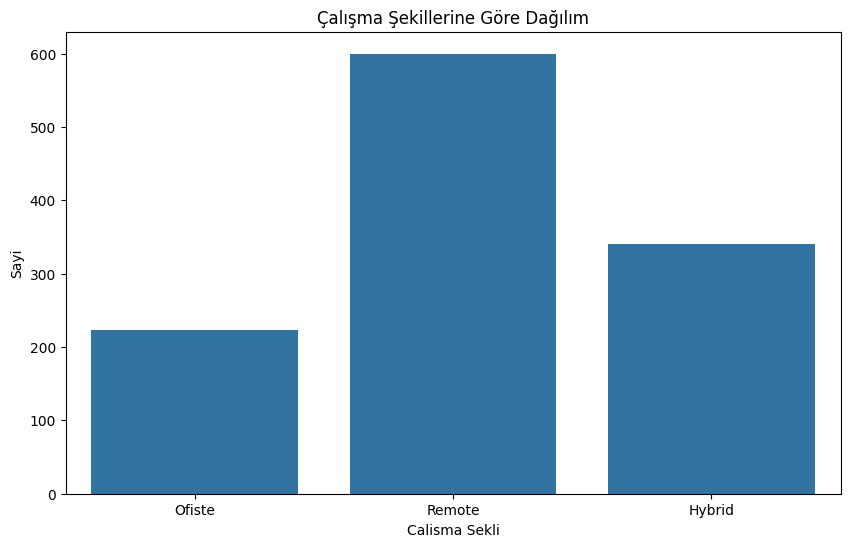

In [107]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Way_of_working')
plt.xlabel('Calisma Sekli')
plt.ylabel('Sayi')
plt.title("Çalışma Şekillerine Göre Dağılım")

En yüksek çubuk, "Remote" (uzaktan) çalışma şekli için gözlemlenmiştir. Yaklaşık 600 çalışan, uzaktan çalışma modeli tercih etmektedir."Hybrid" çalışma şekli, ikinci en yüksek çubuğa sahiptir ve yaklaşık 350 çalışanı temsil eder."Ofiste" çalışma modeli, en düşük çubuğa sahiptir ve bu da yaklaşık 250 çalışanı temsil etmektedir.

# Deneyim Duzeyleri #

Level sütunundaki  değerlerin sayısını döndürmek için kullanılır.

In [108]:
df['Level'].value_counts()

Level
Junior      446
Mid         375
Senior      299
Tanımsız     44
Name: count, dtype: int64

Belirtilen sütundaki her benzersiz değerin sayısını hesaplar ve bu değerleri bir Pandas Series olarak döndürür.

In [109]:
df['Level'].unique

<bound method Series.unique of 0            Mid
1       Tanımsız
2         Junior
3            Mid
4         Junior
          ...   
1159      Senior
1160         Mid
1161      Junior
1162         Mid
1163      Junior
Name: Level, Length: 1164, dtype: object>

Level sütunundaki tüm değerlerden boşluk karakterlerini (' ') kaldırmak için kullanılır.

In [110]:
df['Level'] = df['Level'].apply(lambda x: x.replace(' ',''))

Level sütunundaki  değerlerin sayısını döndürmek için kullanılır. 

In [111]:
df['Level'].value_counts()

Level
Junior      446
Mid         375
Senior      299
Tanımsız     44
Name: count, dtype: int64

# Deneyim Düzeylerini Düzenleme #

Bir fonksiyon tanımlanır ve belirli koşullara göre deneyim seviyelerini (experience level) güncelleyerek bir çalışanın pozisyonunu belirler.

In [112]:
def modify_exp(data):
    if data['Level']=='Tanımsız':
        if data['Experience'] == '1-3 Yıl' or data['Experience']=='0-1 Yıl':
            return 'Junior'
        elif data['Experience'] == '4-6 Yıl':
            return 'Mid'
        elif data['Experience'] == '7-10 Yıl' or data['Experience']=='10+ Yıl':
            return 'Senior'
    else:
        return data['Level']

Veri setindeki pozisyonların daha tutarlı ve anlamlı hale gelmesini sağlar.

In [113]:
df['Level'] = df.apply(modify_exp, axis=1)

Level sütunundaki verilerin sayısını görselleştirmek için bir çubuk grafiği (countplot) oluşturur. 

Text(0.5, 1.0, 'Deneyim Duzeylerinin Dagilimlari')

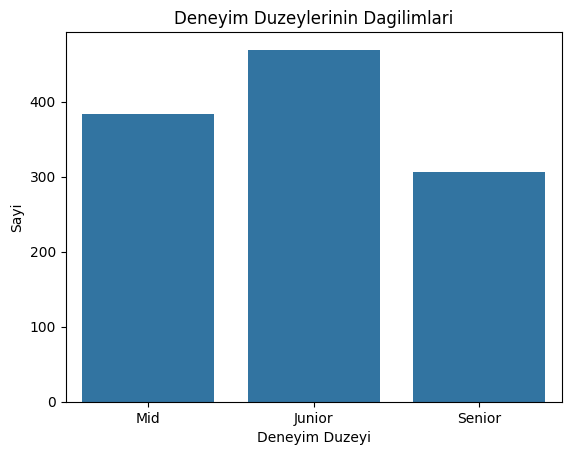

In [114]:
sns.countplot(data=df, x='Level')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Sayi')
plt.title('Deneyim Duzeylerinin Dagilimlari')

En yüksek çubuk, "Junior" deneyim düzeyini temsil ediyor. Bu, sektördeki en fazla sayıda çalışanın Junior seviyesinde olduğunu gösteriyor. Yaklaşık 450-500 arasında bir sayıya ulaşmış durumda."Mid" deneyim düzeyindeki çubuk, Junior seviyesinin arkasında yer alıyor. Yaklaşık 300-350 civarında bir sayıya sahip."Senior" deneyim düzeyi, çubuklar arasında en düşük olanı. Yaklaşık 200-250 arası bir sayıda.

Level sütunundaki deneyim düzeylerinin dağılımını gösteren bir pasta grafiği oluşturur

Text(0.5, 1.0, 'Deneyim Duzeylerinin Dagilimlari')

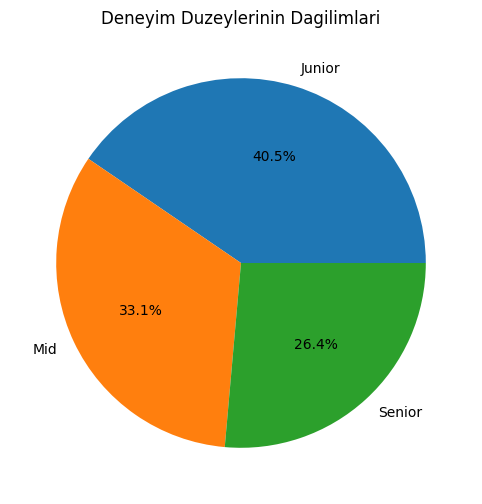

In [115]:
fig = plt.figure(figsize=(10,6))
plt.pie(df['Level'].value_counts(), labels=df['Level'].value_counts().index, autopct='%1.1f%%')
plt.title('Deneyim Duzeylerinin Dagilimlari')

En büyük dilim, Junior düzeyindeki çalışanları temsil ediyor ve toplamın %40.5'ini(446 kişi) oluşturuyor. Mid düzeyindeki çalışanlar, toplamın %33.1'ini(375 kişi) temsil ediyor. Bu oran, sektörün yeterli deneyime sahip profesyonellerle dolu olduğunu, kariyer basamaklarını ilerletmiş kişilerin de sayısının yüksek olduğunu gösteriyor. Senior düzeyindeki çalışanlar, toplamın %26.4'ünü(299) oluşturuyor. Bu oran, deneyimli profesyonellerin sayısının daha az olduğunu ve genellikle daha tecrübeli çalışanların sektörde daha az temsil edildiğini gösteriyor.

Experience sütunundaki deneyim aralıklarını ayırmak için kullanılır. Bu kod ile her bir deneyim aralığının minimum ve maksimum değerlerini elde eden yeni sütunlar oluşturulmaktadır.

In [116]:
df['Min_experience'] = df['Experience'].apply(lambda x: x.split('-')[0])
df['Max_experience'] = df['Experience'].apply(lambda x: x.split('-')[1][:1] if len(x.split('-')) > 1  else np.nan)

Min_experience sütunundaki belirli bir değeri güncellemek için kullanılır. Özellikle, 10+ Yıl ifadesini 10 olarak değiştirir.

In [117]:
df['Min_experience'] = df['Min_experience'].apply(lambda x: '10' if x=='10+ Yıl' else x)

In [119]:
df['Min_experience'].unique()

array(['1', '4', '0', '10', '7'], dtype=object)

Max_experience sütunundaki eksik değerleri Min_experience sütunundaki değerlerle doldurarak veriyi daha tutarlı ve kullanışlı hale getirir.

In [120]:
max_exp_null_variable_index = df[df['Max_experience'].isnull()]['Max_experience'].index
for i in max_exp_null_variable_index:
    df['Max_experience'][i] = df['Min_experience'][i]

C:\Users\aatak\AppData\Local\Temp\ipykernel_1628\596969664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max_experience'][i] = df['Min_experience'][i]
C:\Users\aatak\AppData\Local\Temp\ipykernel_1628\596969664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max_experience'][i] = df['Min_experience'][i]
C:\Users\aatak\AppData\Local\Temp\ipykernel_1628\596969664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ma

Experience sütunundaki deneyim sürelerinin dağılımını ve her deneyim seviyesinin (hue ile) dağılımını görselleştirmek için bir çubuk grafiği (countplot) oluşturur. 

Text(0.5, 1.0, 'Deneyim Seviyelerine Gore Dagilimlar')

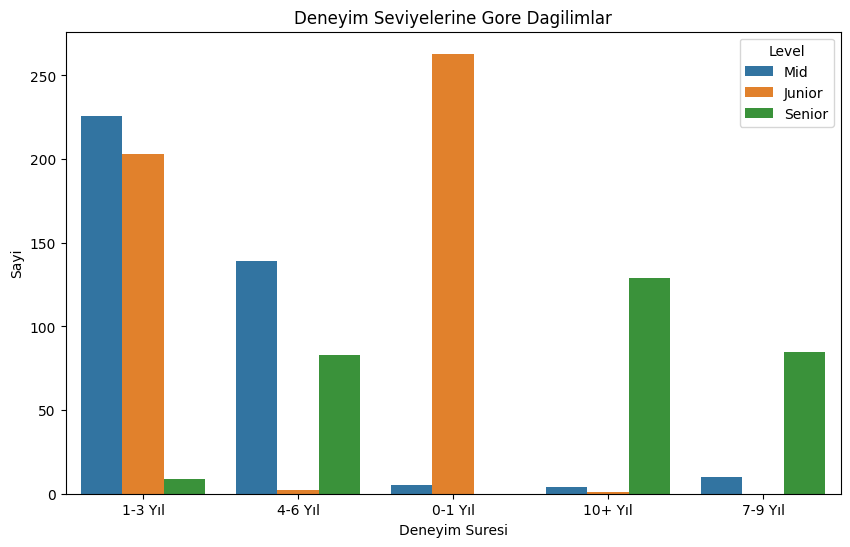

In [123]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Experience', hue='Level')
plt.xlabel('Deneyim Suresi')
plt.ylabel('Sayi')
plt.title('Deneyim Seviyelerine Gore Dagilimlar')

Junior (Turuncu)seviyesindeki çalışan sayısının oldukça yüksek olması, sektöre yeni katılan genç yeteneklerin fazlalığını gösteriyor. Bu, yazılım alanında eğitim alan ve kariyerine yeni başlayan birçok kişinin olduğunu ortaya koyuyor. Mid (mavi)seviyesindeki çalışan sayısı da önemli bir oranda. Bu grup, belirli bir deneyime sahip olan ve iş gücüne katkı sağlayan profesyonellerden oluşuyor. Senior(yeşil) düzeyindeki çalışan sayısının azlığı ise dikkat çekici. Deneyimli profesyonellerin sektörde sınırlı sayıda olması, iş gücünde bir tecrübe açığı olduğunu gösteriyor.

Experience sütunundaki deneyim sürelerinin dağılımını gösteren bir pasta grafiği oluşturur.

Text(0.5, 1.0, 'Deneyim Surelerine Gore Dagilimlar')

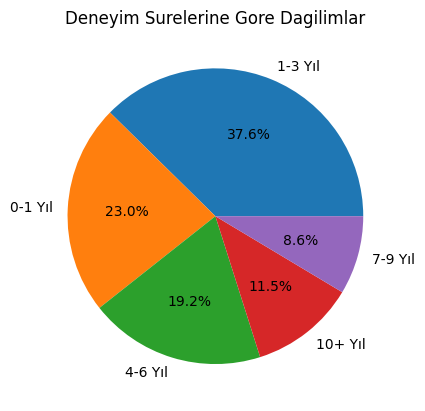

In [124]:
plt.pie(df['Experience'].value_counts(), labels=df['Experience'].value_counts().index, autopct='%1.1f%%')
plt.title('Deneyim Surelerine Gore Dagilimlar')

Grafik, Türkiye'deki yazılımcıların deneyim sürelerine göre dağılımını gösteriyor. "0-1 Yıl" deneyim süresi, grafik üzerindeki dilimlerden biri ve bu dilim %23'lük bir paya sahip. En büyük dilim ise "1-3 Yıl" deneyim süresine ait ve %37.6'lık bir oranla grafik üzerinde öne çıkıyor. Bu durum, belirli bir deneyime sahip yazılımcıların sayısının fazla olduğunu ve kariyerlerinde ilerleyen genç profesyonellerin varlığını ortaya koyuyor. 4-6 Yıl" deneyim süresi %19.2'lik bir paya sahip. Bu seviye, yeterli deneyime sahip çalışanları temsil ediyor, ancak bu oranın daha düşük olması, belirli bir aşamada kariyer geçişlerinin zorlaştığını gösterebilir. "7-9 Yıl" deneyim süresi %11.5 oranıyla daha az sayıda çalışanı kapsıyor. Bu, sektördeki deneyimli profesyonellerin sayısının sınırlı olduğunu gösteriyor.

# Calisan Sayisi #

Employees_number sütunundaki çalışan sayılarını gösteren bir pasta grafiği oluşturur. 

Text(0.5, 1.0, 'Sirketteki Calisan Sayilarinin Gore Dagilimlari')

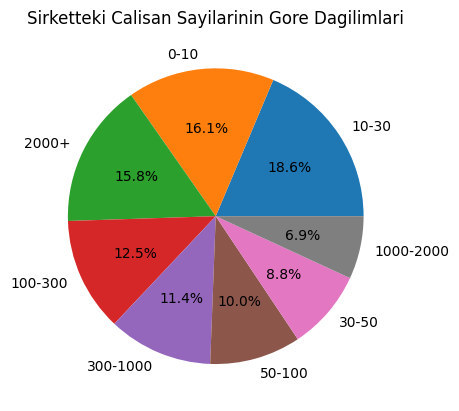

In [127]:
plt.pie(df['Employees_number'].value_counts(), labels=df['Employees_number'].value_counts().index, autopct='%1.1f%%')
plt.title('Sirketteki Calisan Sayilarinin Gore Dagilimlari')

Grafikteki sayılar, Türkiye'deki yazılımcıların çalışan sayısının belirli aralıklara göre dağılımını gösteriyor. "0-10" aralığı, en fazla 10 çalışanı olan küçük ekipleri temsil ederken, "10-30" aralığı biraz daha büyük grupları ifade ediyor. "30-50" ve "50-100" aralıkları, belirli bir deneyime sahip profesyonellerin bulunduğu orta ölçekli şirketleri gösteriyor.

"100-300" aralığı, daha büyük organizasyonlardaki çalışan sayısını belirtirken, "300-1000" ve "1000-2000" dilimleri, önemli iş gücüne sahip büyük şirketleri temsil ediyor. Son olarak, "2000+" dilimi, sektördeki çok büyük organizasyonların varlığını işaret ediyor. Bu dağılım, yazılım sektöründeki iş gücünün yapısını anlamamıza yardımcı oluyor.

# Maas Dagilimi #

Belirli bir maaş veya para birimi ifadesini, daha standardize bir formata dönüştürmek için tanımlanır.

In [128]:
def maas_duzenleme(x):
    if x == "Maaş TL Primler Dolar" or x == 25000 or x == 11500 or x == "Dolar bazlı TL" or x == "Dolar endeksli Türk lirası(2 ayda bir dolara göre zam)":
        return "Türk Lirası"
    elif x == 1250 or x == "250 Dolar 4700tl ortalama" or x == "USDT" or x == 1500 or x == 3000:
        return "Dolar"
    elif x == "CAD":
        return "Canadian Dolar"
    else:
        return x

Salary sütunundaki değerleri, daha önce tanımladığınız maas_duzenleme fonksiyonunu kullanarak günceller.

In [129]:
df['Salary'] = df['Salary'].apply(maas_duzenleme)

Location sütununa göre veri çerçevesini iki ayrı alt veri çerçevesine ayırır: biri yurt içi (Türkiye) verileri, diğeri ise yurt dışı verileri

In [130]:
yurt_ici = df[df['Location']=='Türkiye']
yurt_disi = df[df['Location']!='Türkiye']

DataFrame deki sayısal sütunları hakkında istatistiksel özet bilgilerini döndürür.

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min_Salary,1164.0,27390.893471,24645.712191,5000.0,11000.0,21000.0,31000.0,200000.0
Max_Salary,1164.0,28362.542955,18974.504478,10000.0,15000.0,25000.0,35000.0,200000.0
Avg_Salary,1164.0,27876.718213,19966.966681,7500.0,13000.0,23000.0,33000.0,200000.0


Level sütunundaki deneyim düzeylerine göre Avg_Salary sütunundaki ortalama maaşların dağılımını görselleştirmek için bir kutu grafiği (box plot) oluşturur. 

Text(0.5, 1.0, 'Deneyim Duzeylerine Gore Ortalama Maas Dagilimlari')

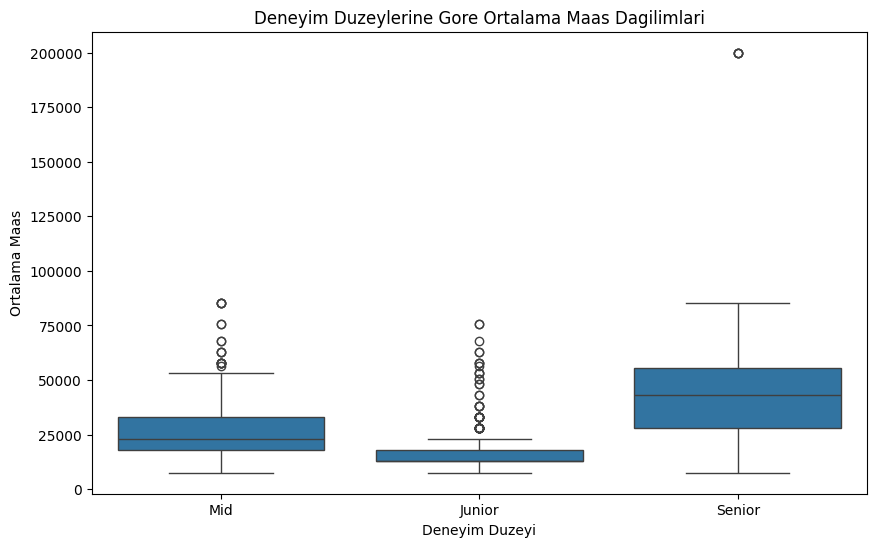

In [133]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Level', y='Avg_Salary')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Ortalama Maas')
plt.title('Deneyim Duzeylerine Gore Ortalama Maas Dagilimlari')

Grafikteki kutu grafiği, Deneyim düzeylerine göre ortalama maaş dağılımını gösteriyor. Her bir deneyim düzeyi için farklı maaş aralıkları ve bu aralıklardaki dağılım şekli net bir şekilde ortaya konmuş.

Junior Düzeyi: Grafik, Junior çalışanların ortalama maaşlarının oldukça düşük olduğunu gösteriyor. Kutu içindeki medyan, diğer deneyim seviyelerine göre belirgin bir şekilde daha düşük. Bu durum, yazılım sektörüne yeni giren profesyonellerin genellikle daha az kazandığını ve başlangıç seviyesindeki pozisyonların daha düşük maaşlar sunduğunu ortaya koyuyor. Ayrıca, bu seviyedeki maaş dağılımında birçok uç nokta (outlier) var. Bu durum, bazı Junior pozisyonlarda yüksek maaş alanların bulunduğunu ancak genelde düşük maaşların yaygın olduğunu gösteriyor.

Mid Düzeyi: Orta düzey çalışanların maaşları, Junior seviyesine göre daha yüksek ve ortalama maaş kutusunun üst sınırları oldukça belirgin. Kutu içindeki medyan, 25.000 TL civarında; bu, Mid düzeyindeki çalışanların daha yüksek bir deneyimle birlikte maaşlarını artırdığını gösteriyor. Ancak, bu seviyedeki maaş dağılımında da bazı uç noktalar var, bu da bazı Mid çalışanlarının yüksek maaşlar aldığını ancak çoğunluğun ortalama seviyelerde kaldığını işaret ediyor.

Senior Düzeyi: Grafik, Senior çalışanların ortalama maaşlarının diğer iki düzeye göre çok daha yüksek olduğunu gösteriyor. Kutu içindeki medyan, 50.000 TL civarındayken, üst çeyrekler oldukça yükseğe çıkıyor. Bu, deneyimli profesyonellerin sektördeki değerini ve bilgi birikimlerinin karşılığını daha iyi aldığı anlamına geliyor. Ancak, Senior düzeyindeki dağılımda belirgin uç noktaların olmaması, bu seviyede maaşların daha az değişkenlik gösterdiğini, yani genel olarak yüksek maaşların standart bir durum olduğunu ortaya koyuyor.

Yurt_ici veri çerçevesindeki Türkiye'deki çalışanların deneyim düzeylerine göre ortalama maaş dağılımını gösteren bir kutu grafiği (box plot) oluşturur.

Text(0.5, 1.0, 'Turkiye de Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

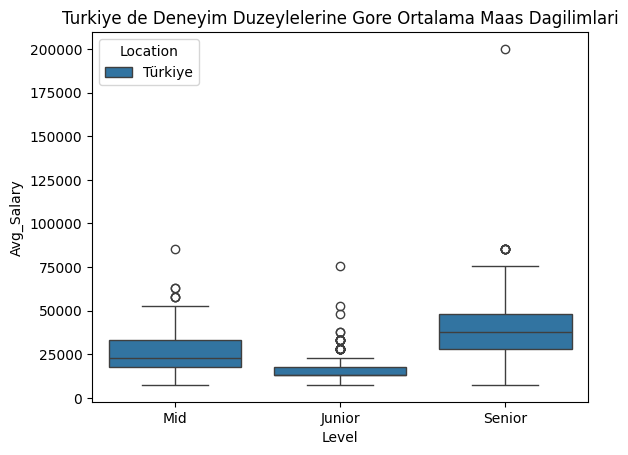

In [134]:
sns.boxplot(data=yurt_ici, x='Level', y='Avg_Salary',hue='Location')
plt.title('Turkiye de Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

Grafik, Türkiye'deki yazılımcıların deneyim düzeylerine göre ortalama maaş dağılımını kutu grafiği ile göstermektedir. Üç ana deneyim seviyesi olan Junior, Mid ve Senior düzeyindeki çalışanların ortalama maaşları arasındaki farkları açıkça ortaya koyuyor.

Junior Düzeyi: Kutu grafiğinde Junior düzeyindeki çalışanların ortalama maaşları en düşük seviyededir. Kutu içindeki medyan değeri, diğer iki düzeye göre belirgin bir şekilde aşağıda yer alıyor. Bu durum, sektöre yeni giren yazılımcıların genellikle daha az kazandığını ve bu seviyedeki maaşların daha geniş bir dağılım gösterdiğini ortaya koyuyor. Ayrıca, uç noktalar (outlier) mevcut; bu da bazı Junior çalışanların beklenenden daha yüksek maaşlar aldığını, ancak bu durumun genel eğilimi yansıtmadığını gösteriyor.

Mid Düzeyi: Mid düzeyindeki çalışanların maaşları, Junior seviyesine göre belirgin bir artış göstermekte. Medyan maaş, yaklaşık 25.000 TL civarındadır ve bu seviye, sektörde belirli bir deneyime sahip olan yazılımcıları ifade ediyor. Ancak, bu düzeydeki maaş dağılımında da bazı uç noktalar var, bu da bazı Mid çalışanlarının daha yüksek maaş aldığını gösteriyor. Genel olarak, Mid düzeyindeki çalışanların maaşları, kariyer gelişiminde önemli bir aşamayı temsil ediyor.

Senior Düzeyi: Kutu grafiğinde Senior çalışanların ortalama maaşları, diğer iki düzeye göre en yüksek seviyededir. Medyan değeri, 50.000 TL civarında, bu da deneyimli yazılımcıların sektördeki değerini yansıtmaktadır. Senior düzeyindeki dağılım daha az değişkenlik gösteriyor; bu, bu seviyedeki çalışanların genellikle yüksek ve stabil maaşlar aldığını işaret ediyor. Ayrıca, uç noktalar az sayıda bulunuyor, bu da Senior pozisyonlarındaki maaşların genel olarak daha tutarlı olduğunu gösteriyor.

Yurt_disi veri çerçevesindeki yurt dışındaki çalışanların deneyim düzeylerine göre ortalama maaş dağılımını gösteren bir kutu grafiği (box plot) oluşturur.

Text(0.5, 1.0, 'Yurt Disinda Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

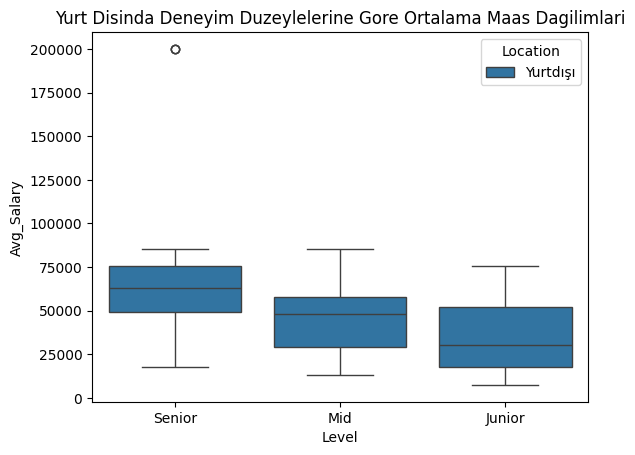

In [135]:
sns.boxplot(data=yurt_disi, x='Level', y='Avg_Salary',hue='Location')
plt.title('Yurt Disinda Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

Grafik, yurt dışında çalışan yazılımcıların deneyim düzeylerine göre ortalama maaş dağılımını kutu grafiği ile gösteriyor. Bu grafik, farklı deneyim seviyelerindeki çalışanların maaşlarının nasıl değiştiğini açık bir şekilde ortaya koyuyor.

Junior Düzeyi: Yurt dışında çalışan Junior düzeyindeki yazılımcıların maaşları, ortalama olarak en düşük seviyede. Kutu içindeki medyan, 25.000 TL civarında ve bu, sektöre yeni girenlerin genellikle daha düşük maaşlar aldığını gösteriyor. Ancak, bu seviye için kutu grafiğinde uç noktalar (outlier) gözlemleniyor. Bu durum, bazı Junior çalışanların beklenenden daha yüksek maaşlar aldığını ancak çoğunluğun düşük maaşlarla sınırlı kaldığını gösteriyor.

Mid Düzeyi: Mid düzeyindeki çalışanlar, Junior seviyesine göre belirgin bir maaş artışına sahip. Medyan maaş, yaklaşık 50.000 TL civarındadır ve bu durum, Mid düzeyindeki yazılımcıların deneyim ve bilgi birikimleriyle daha iyi maaşlar kazandığını gösteriyor. Kutu grafiğindeki dağılım, Mid çalışanların maaşlarının belirli bir istikrar gösterdiğini ve daha az uç noktaya sahip olduğunu ortaya koyuyor.

Senior Düzeyi: Kutu grafiğinde Senior düzeyindeki çalışanların ortalama maaşları diğer iki düzeye göre en yüksek seviyededir. Medyan değeri, 75.000 TL civarındadır, bu da deneyimli profesyonellerin sektördeki değerinin yüksek olduğunu yansıtıyor. Senior düzeyindeki çalışanlar, genellikle daha az değişkenliğe sahip bir maaş dağılımı gösteriyor, bu da sektördeki deneyimlerinin ve bilgi birikimlerinin karşılığını daha tutarlı bir şekilde aldıklarını gösteriyor.

Türkiye'deki çalışanların deneyim düzeylerinin sayısını gösteren bir çubuk grafiği oluşturur.

Text(0, 0.5, 'Sayi')

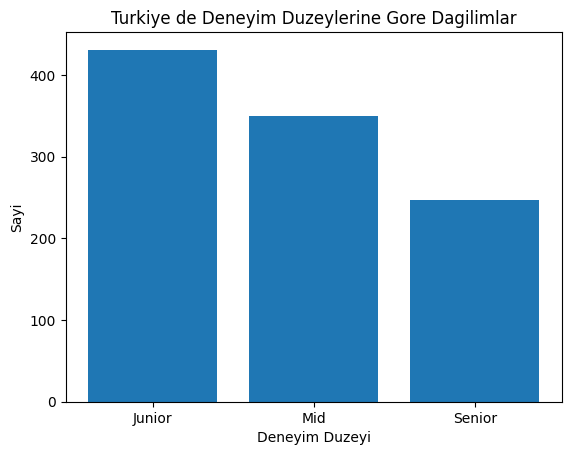

In [56]:
plt.bar(yurt_ici['Level'].value_counts().index, yurt_ici['Level'].value_counts().values)
plt.title('Turkiye de Deneyim Duzeylerine Gore Dagilimlar')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Sayi')

Grafik, Türkiye'deki yazılımcıların deneyim düzeylerine göre dağılımını çubuk grafiği ile sunuyor. Üç ana düzey olan Junior, Mid ve Senior çalışanlarının sayıları arasındaki farkları açıkça gösteriyor. , Junior seviyesindeki çalışanların sayısının en yüksek olduğunu gösteriyor. Çubuk, 400’den fazla çalışanı temsil ediyor.  Mid seviyesindeki çalışan sayısı da önemli bir oranı kaplıyor, ancak Junior seviyesine göre daha düşük. Çubuk, Mid düzeyindeki çalışan sayısının 350 civarında olduğunu gösteriyor. Senior çalışan sayısı, grafik üzerinde en düşük çubuğa sahip. Bu seviye, 250'ün altında bir sayıya işaret ediyor. 

Türkiye'deki çalışanların deneyim düzeylerinin dağılımını gösteren bir pasta grafiği oluşturur.

Text(0.5, 1.0, 'Yurt içinde Deneyim Düzylerine göre dağılımları')

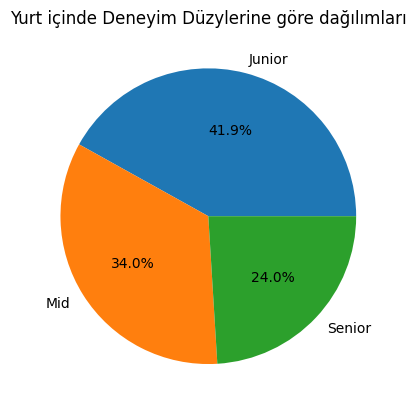

In [136]:
plt.pie(yurt_ici['Level'].value_counts(), labels=yurt_ici['Level'].value_counts().index, autopct='%1.1f%%')
plt.title("Yurt içinde Deneyim Düzylerine göre dağılımları")

Grafik, yurt içindeki yazılımcıların deneyim düzeylerine göre dağılımını pasta grafiği ile gösteriyor. Farklı dilimlerin yüzdeleri, her deneyim seviyesinin toplam içindeki oranını temsil ediyor. Pasta dilimlerinin en büyük olanı, %41.9 oranıyla Junior seviyesindeki çalışanları ifade ediyor. Bu, sektöre yeni adım atan veya kariyerinin başında olan yazılımcıların sayısının oldukça fazla olduğunu gösteriyor. %34.0’lık bir oranla Mid düzeyindeki çalışanlar ikinci en büyük dilimi oluşturuyor. Bu, belirli bir deneyime sahip profesyonellerin önemli bir kısmının sektörde yer aldığını gösteriyor. Pasta diliminin en küçük kısmını, %24.0 ile Senior düzeyindeki çalışanlar alıyor. Bu, deneyimli profesyonellerin sayısının az olduğunu ve sektördeki kıdemli pozisyonların doldurulmasında zorluk yaşandığını gösteriyor.

Yurt dışındaki çalışanların deneyim düzeylerinin sayısını gösteren bir çubuk grafiği oluşturur.

Text(0, 0.5, 'Sayi')

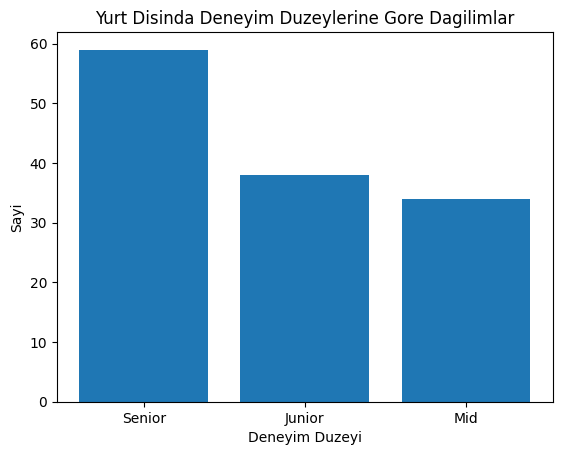

In [137]:
plt.bar(yurt_disi['Level'].value_counts().index, yurt_disi['Level'].value_counts().values)
plt.title('Yurt Disinda Deneyim Duzeylerine Gore Dagilimlar')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Sayi')

Grafik, yurt dışındaki yazılımcıların deneyim düzeylerine göre dağılımını çubuk grafiği ile gösteriyor. Üç ana düzey olan Junior, Mid ve Senior çalışanlarının sayıları arasındaki farkları net bir şekilde ortaya koyuyor. Yurt dışında çalışan Senior düzeyindeki yazılımcılar, en yüksek sayıya sahip ve grafik üzerinde 60 civarında bir değerle belirgin bir şekilde öne çıkıyor. Bu durum, deneyimli profesyonellerin yurt dışında daha fazla fırsat bulduğunu ve sektördeki tecrübe açığını kapatabilecek potansiyele sahip olduğunu gösteriyor. Junior çalışan sayısı, yaklaşık 30 civarında. Bu seviye, sektöre yeni giren yazılımcıları temsil ediyor. Junior düzeyindeki sayının, Senior düzeyine göre daha düşük olması, deneyimli profesyonellerin sektördeki ihtiyaçları karşıladığını, ancak gençlerin yurt dışında daha az fırsata sahip olduğunu gösteriyor.  Mid düzeyindeki çalışan sayısı da Junior seviyesine yakın bir seviyede yer alıyor, yaklaşık 30. Bu durum, deneyimli çalışanların olduğu kadar, belirli bir deneyime sahip profesyonellerin de yurt dışındaki iş gücünde önemli bir yere sahip olduğunu gösteriyor.

Yurt dışındaki çalışanların deneyim düzeylerinin dağılımını gösteren bir pasta grafiği oluşturur.

Text(0.5, 1.0, 'Yurt Disinda Deneyim Duzeylerine Gore Dagilimlar')

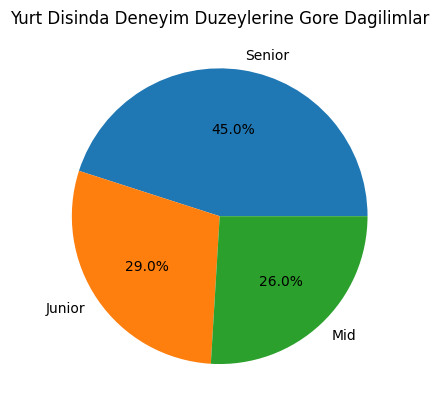

In [138]:
plt.pie(yurt_disi['Level'].value_counts(), labels=yurt_disi['Level'].value_counts().index, autopct='%1.1f%%')
plt.title('Yurt Disinda Deneyim Duzeylerine Gore Dagilimlar')

Grafik, yurt dışındaki yazılımcıların deneyim düzeylerine göre dağılımını pasta grafiği ile sunuyor. Farklı dilimlerin yüzdeleri, her deneyim seviyesinin toplam içindeki oranını belirtiyor. Pasta dilimlerinin en büyük olanı %45.0 oranıyla Senior çalışanları ifade ediyor. Bu, deneyimli profesyonellerin yurt dışında daha fazla fırsata sahip olduğunu ve sektördeki değerlerinin yüksek olduğunu gösteriyor. Senior düzeyindeki yazılımcıların bu kadar yüksek bir orana sahip olması, yurt dışındaki iş gücünün, deneyimli ve bilgili bireyler arayışında olduğunu gösteriyor.  %29.0'lık bir oranla Junior düzeyindeki çalışanlar ikinci en büyük dilimi oluşturuyor. Bu durum, sektöre yeni adım atan genç yazılımcıların yurt dışında da ilgi gördüğünü gösteriyor. Pasta diliminin en küçük kısmını, %26.0 ile Mid düzeyindeki çalışanlar alıyor. Bu, belirli bir deneyime sahip profesyonellerin sayısının daha az olduğunu gösteriyor. Mid düzeyindeki çalışanların oranın düşük olması, deneyim kazanmış ancak yurt dışında daha az fırsat bulmuş olabilecekleri anlamına geliyor.

Location sütunundaki lokasyonlara göre Avg_Salary sütunundaki ortalama maaşların dağılımını gösteren bir kutu grafiği (box plot) oluşturur.

Text(0.5, 1.0, 'Lokasyona Göre Ortalama Maaşlar')

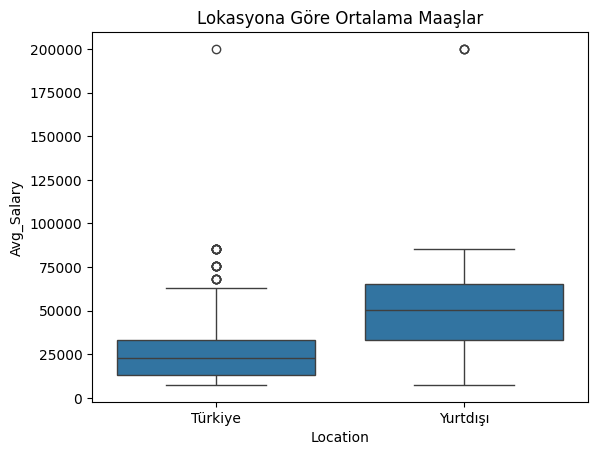

In [61]:
sns.boxplot(data=df, x='Location', y='Avg_Salary')
plt.title("Lokasyona Göre Ortalama Maaşlar")

Grafik, Türkiye ve yurt dışındaki yazılımcıların ortalama maaşlarının dağılımını kutu grafiği ile gösteriyor. İki farklı lokasyonun maaş yapısını karşılaştırarak, her birinin maaş aralıkları ve olası uç noktalarını inceleme fırsatı sunuyor.
Kutu grafiğinde Türkiye'deki yazılımcıların ortalama maaşları belirgin bir şekilde daha düşük. Medyan değer, yaklaşık 25.000 TL civarında olup, bu durum Türkiye'deki yazılımcıların genellikle daha düşük maaşlarla çalıştığını gösteriyor. Kutu içindeki üst ve alt çeyrekler, Türkiye'deki maaşların geniş bir dağılım gösterdiğini, bazı uç noktaların (outlier) var olduğunu ortaya koyuyor. Uç noktalar, Türkiye'deki belirli pozisyonların, diğerlerine göre çok daha yüksek maaşlar aldığı anlamına geliyor. 
Yurt dışındaki yazılımcıların ortalama maaşları ise belirgin bir şekilde daha yüksektir. Medyan değer, yaklaşık 50.000 TL civarındadır. Bu, yurt dışında çalışan yazılımcıların, Türkiye'dekilere göre daha yüksek maaş aldığını gösteriyor. Yurt dışındaki maaş dağılımı da benzer şekilde, üst çeyrekte bazı yüksek uç noktalar içermekte, bu da bazı pozisyonların daha fazla değer gördüğünü işaret ediyor.



Yurt_ici veri çerçevesindeki Türkiye'deki çalışanların deneyim seviyelerine göre sayısını hesaplar ve her bir deneyim düzeyini temsil eden toplam çalışan sayısını saklar. 

In [62]:
yurt_ici_jr = yurt_ici[yurt_ici['Level']=='Junior'].value_counts().sum()
yurt_ici_mid = yurt_ici[yurt_ici['Level']=='Mid'].value_counts().sum()
yurt_ici_sr = yurt_ici[yurt_ici['Level']=='Senior'].value_counts().sum()

Yurt_disi veri çerçevesindeki yurt dışındaki çalışanların deneyim seviyelerine göre sayısını hesaplar ve her bir deneyim düzeyini temsil eden toplam çalışan sayısını saklar.

In [63]:
yurt_disi_jr = yurt_disi[yurt_disi['Level']=='Junior'].value_counts().sum()
yurt_disi_mid = yurt_disi[yurt_disi['Level']=='Mid'].value_counts().sum()
yurt_disi_sr = yurt_disi[yurt_disi['Level']=='Senior'].value_counts().sum()

DataFrame deki Position sütunundaki benzersiz (unique) pozisyonların sayısını döndürür.

In [140]:
df["Position"].nunique()

110

DataFrame deki pozisyonların dağılımını analiz etmek ve düşük yüzdeli pozisyonları "Other" kategorisine toplamak için tasarlanmıştır. 

In [141]:
def position_modify(x):
    position_counts = x["Position"].value_counts()
    total_positions = len(x)
    position_percentages = (position_counts / total_positions)* 100
    
    threshold_percentages = 1
    main_positions = position_percentages[position_percentages > threshold_percentages]
    other_percentage = position_percentages[position_percentages <= threshold_percentages].sum()
    main_positions["Other"] = other_percentage
    
    return(main_positions)

Daha önce tanımladığınız position_modify fonksiyonunu çağırarak DataFrame deki pozisyonların analizi için gerekli hesaplamaları yapar.

In [142]:
main_positions = position_modify(df)

Pozisyonların dağılımını gösteren bir pasta grafiği oluşturur.

Text(0.5, 1.0, 'Pozisyonlara Gore Dagilimlar')

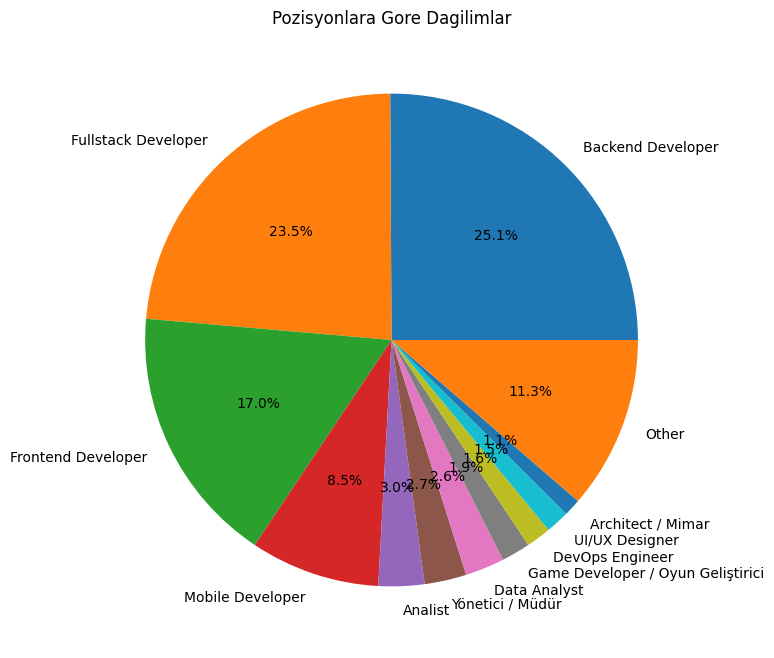

In [144]:
plt.figure(figsize=(12,8))
plt.pie(main_positions, labels=main_positions.index, autopct='%1.1f%%')
plt.title("Pozisyonlara Gore Dagilimlar")

Grafik, yazılım sektöründeki farklı pozisyonların sektördeki dağılımını yansıtmakta ve belirli pozisyonlara olan talep ile uzmanlık alanlarının çeşitliliğini göstermektedir. Backend ve Fullstack Developer pozisyonlarının ön planda olduğu, Frontend Developer pozisyonunun da önemli bir yere sahip olduğu görülmektedir. Diğer pozisyonlar, sektörün farklı alanlarındaki uzmanlık gereksinimlerini karşılarken, her biri belirli bir ihtiyaca hizmet etmektedir.

 Türkiye'deki pozisyonların dağılımını gösteren bir pasta grafiği oluşturur.

Text(0.5, 1.0, 'Turkiye de Pozisyonlara Gore Dagilimlar')

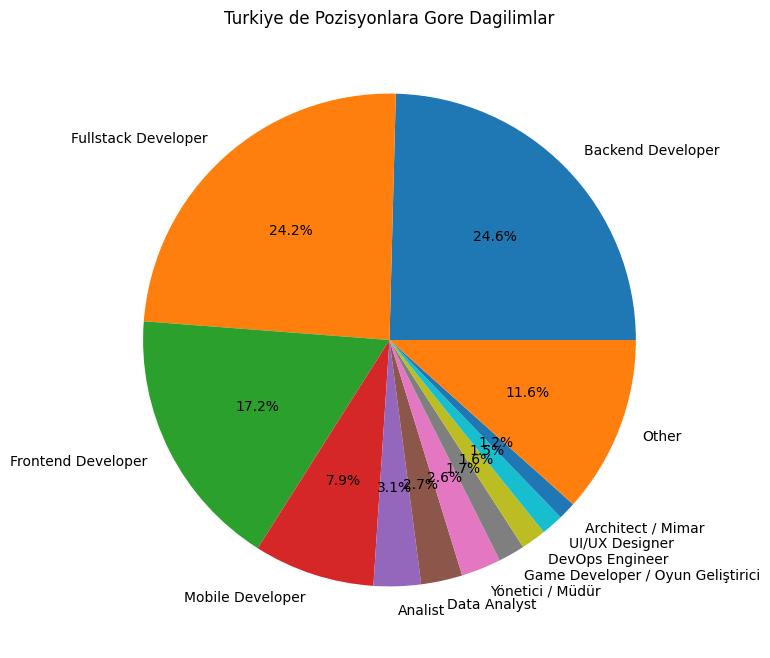

In [72]:
yurt_ici_Pos = position_modify(yurt_ici)

plt.figure(figsize=(12,8))
plt.pie(yurt_ici_Pos, labels=yurt_ici_Pos.index, autopct='%1.1f%%')
plt.title("Turkiye de Pozisyonlara Gore Dagilimlar")

Grafik, Türkiye'deki yazılımcıların pozisyonlarının sektördeki dağılımını yansıtmakta ve belirli pozisyonlara olan talep ile uzmanlık alanlarının çeşitliliğini göstermektedir. Backend ve Fullstack Developer pozisyonları, sektördeki iş gücünün büyük bir kısmını temsil ederken, Frontend Developer pozisyonu da önemli bir yere sahiptir. Diğer pozisyonlar, daha niş alanlara odaklanan uzmanlık gereksinimlerini karşılamaktadır.

Yurt dışındaki pozisyonların dağılımını gösteren bir pasta grafiği oluşturur.

Text(0.5, 1.0, 'Yurt Disinda Pozisyonlara Gore Dagilimlar')

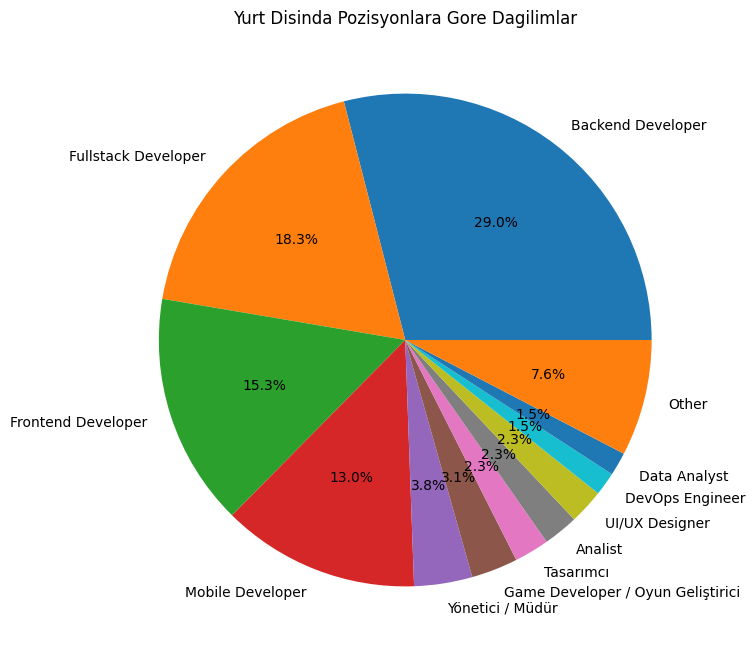

In [73]:
yurt_disi_Pos = position_modify(yurt_disi)

plt.figure(figsize=(12,8))
plt.pie(yurt_disi_Pos, labels=yurt_disi_Pos.index, autopct='%1.1f%%')
plt.title("Yurt Disinda Pozisyonlara Gore Dagilimlar")

Grafik, yurt dışındaki yazılımcıların pozisyonlarının dağılımını net bir şekilde ortaya koyuyor. Backend ve Fullstack Developer pozisyonları, yurt dışındaki yazılım iş gücünün önemli bir kısmını oluştururken, Frontend Developer pozisyonu da önemli bir yer tutmaktadır. Diğer pozisyonlar, daha niş alanlara odaklanan uzmanlık gereksinimlerini karşılamaktadır. Bu dağılım, yurt dışındaki yazılım sektörü için, deneyimli ve çok yönlü profesyonellere olan talebin arttığını gösteriyor.

# Türkiye ve türkiyeden yurt dışına hizmet veren çalışanların maaşlarının, deneyim seviyelerine göre çalışma şekli (hibrit, uzaktan veya ofiste) ile nasıl değiştiğini göstermektedir. #


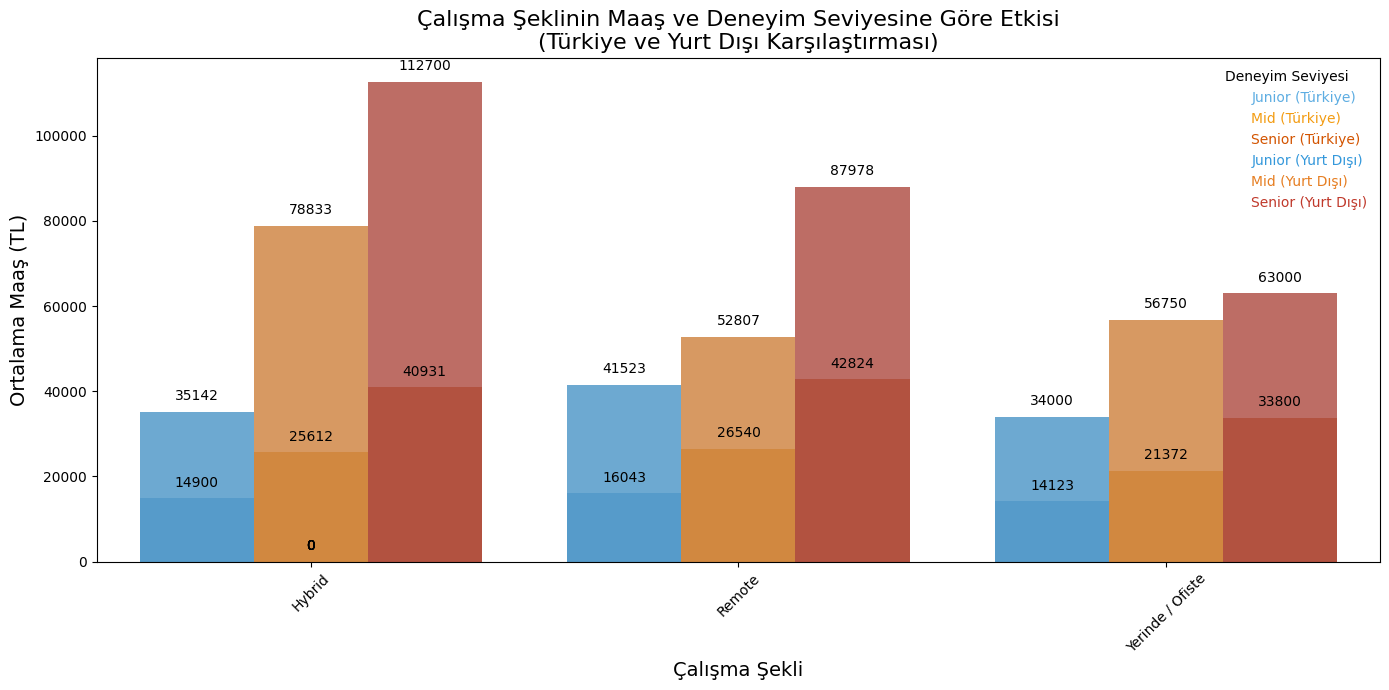

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını oku
df = pd.read_csv('salary.csv')

# Salary sütunundaki '+' ve ' TL' gibi ifadeleri temizleyelim
df['Salary'] = df['Salary'].str.replace('+', '', regex=False).str.replace(' TL', '', regex=False)

# Maaş aralığını ayırmak için 'Min_Salary' ve 'Max_Salary' hesaplayalım
df['Min_Salary'] = df['Salary'].apply(lambda x: int(x.split('-')[0].replace('.', '')) if '-' in x else int(x.replace('.', '')))
df['Max_Salary'] = df['Salary'].apply(lambda x: int(x.split('-')[1].replace('.', '')) if '-' in x else int(x.replace('.', '')))

# 'Avg_Salary' hesaplayalım
df['Avg_Salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2

# Türkiye ve yurt dışı verilerini ayıralım
yurt_ici = df[df['Location'] == 'Türkiye']
yurt_disi = df[df['Location'] != 'Türkiye']

# Tanımsız seviyeleri çıkartalım
yurt_ici = yurt_ici[yurt_ici['Level'] != 'Tanımsız']
yurt_disi = yurt_disi[yurt_disi['Level'] != 'Tanımsız']

# Türkiye ve yurt dışı için çalışma şekli ve ortalama maaş analizi
yurt_ici_salary_stats = yurt_ici.groupby(['Way_of_working', 'Level'])['Avg_Salary'].mean().reset_index()
yurt_disi_salary_stats = yurt_disi.groupby(['Way_of_working', 'Level'])['Avg_Salary'].mean().reset_index()

# Grafikte Tanımsız kısmını kullanmayalım
plt.figure(figsize=(14, 7))

# Türkiye verisi
sns.barplot(data=yurt_ici_salary_stats, x='Way_of_working', y='Avg_Salary', hue='Level', 
            palette={'Junior': '#5DADE2', 'Mid': '#F39C12', 'Senior': '#D35400'}, alpha=0.8, dodge=True)

# Yurt Dışı verisi
sns.barplot(data=yurt_disi_salary_stats, x='Way_of_working', y='Avg_Salary', hue='Level', 
            palette={'Junior': '#3498DB', 'Mid': '#E67E22', 'Senior': '#C0392B'}, alpha=0.8, dodge=True)

plt.title('Çalışma Şeklinin Maaş ve Deneyim Seviyesine Göre Etkisi\n(Türkiye ve Yurt Dışı Karşılaştırması)', fontsize=16)
plt.xlabel('Çalışma Şekli', fontsize=14)
plt.ylabel('Ortalama Maaş (TL)', fontsize=14)

# Renk paletlerini güncelle
plt.legend(title='Deneyim Seviyesi', loc='upper right', 
           labels=['Junior (Türkiye)', 'Mid (Türkiye)', 'Senior (Türkiye)', 
                   'Junior (Yurt Dışı)', 'Mid (Yurt Dışı)', 'Senior (Yurt Dışı)'], 
           handlelength=2.5, handleheight=0.5, frameon=False)

# Her çubuğun üzerine metin ekleme
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 2000, 
             f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)

# Legend'deki çizgileri kaldır
legend = plt.gca().get_legend()
for line in legend.get_lines():
    line.set_visible(False)

# Renk paletlerini güncelle ve çizgi yerine renklendirme ekle
for text in legend.get_texts():
    if 'Türkiye' in text.get_text():
        text.set_color('#5DADE2' if 'Junior' in text.get_text() else '#F39C12' if 'Mid' in text.get_text() else '#D35400')
    else:
        text.set_color('#3498DB' if 'Junior' in text.get_text() else '#E67E22' if 'Mid' in text.get_text() else '#C0392B')

plt.tight_layout()
plt.show()



### Grafikte üç ana çalışma modeli görülmektedir: Hibrit, Uzaktan ve Ofiste çalışma. Her bir çalışma modelinin Türkiye'deki ve yurtdışına hizmet veren çalışanlar için ortalama maaşları farklılık göstermektedir.

## Hibrit Çalışma Modeli:

#### Türkiye'deki junior çalışanlar için ortalama maaş: 14,900 TL; yurtdışına hizmet veren junior çalışanlar için: 35,142 TL
#### Türkiye'deki mid seviye çalışanlar için ortalama maaş: 25,612 TL; yurtdışına hizmet veren mid seviye çalışanlar için: 78,833 TL
#### Türkiye'deki senior çalışanlar için ortalama maaş: 40,931 TL; yurtdışına hizmet veren senior çalışanlar için: 112,700 TL

## Uzaktan Çalışma Modeli:

#### Türkiye'deki junior çalışanlar için ortalama maaş: 16,043 TL; yurtdışına hizmet veren junior çalışanlar için: 41,523 TL
#### Türkiye'deki mid seviye çalışanlar için ortalama maaş: 26,540 TL; yurtdışına hizmet veren mid seviye çalışanlar için: 52,807 TL
#### Türkiye'deki senior çalışanlar için ortalama maaş: 42,824 TL; yurtdışına hizmet veren senior çalışanlar için: 87,978 TL

## Ofiste Çalışma Modeli:

#### Türkiye'deki junior çalışanlar için ortalama maaş: 14,123 TL; yurtdışına hizmet veren junior çalışanlar için: 34,000 TL
#### Türkiye'deki mid seviye çalışanlar için ortalama maaş: 21,372 TL; yurtdışına hizmet veren mid seviye çalışanlar için: 56,750 TL
#### Türkiye'deki senior çalışanlar için ortalama maaş: 33,800 TL; yurtdışına hizmet veren senior çalışanlar için: 63,000 TL

## Sonuçlar

### Veri analizi sonuçlarına dayanarak Türkiye ve yurt dışındaki yazılım geliştirme sektörüne ilişkin önemli bulgular elde edilmiştir.
#### Türkiye'deki yazılım geliştirme maaşları, yurt dışındaki maaşlarla karşılaştırıldığında genel olarak daha düşüktür. Yurt dışında ortalama maaşların daha yüksek olması, bu bölgelerdeki iş gücü talebinin artış göstermesi ve yaşam standartlarının farklılığına bağlı olarak açıklanabilir.
#### Örneğin, yurt dışında bir "Frontend Developer" pozisyonunun maaşı, Türkiye'deki karşılığına göre belirgin bir farkla yüksektir.Türkiye'deki yazılım geliştiricilerin deneyim seviyelerine göre dağılımı, yurt dışına göre daha fazla "Junior" ve "Mid" seviyedeki pozisyonlardan oluşmaktadır. Yurt dışında "Senior" pozisyonları daha fazla görülmektedir; bu durum, yurt dışındaki iş gücü yapısının daha olgunlaşmış olduğunu göstermektedir. Yurt dışında "Senior" seviyesindeki çalışanlar, projelerde daha fazla deneyime ve liderlik yetkinliğine sahip oldukları için yüksek maaşları hak etmektedir.
#### Yurt dışındaki pozisyon dağılımı incelendiğinde, "Backend Developer" ve "Fullstack Developer" pozisyonlarının ön planda olduğu görülmektedir. Bu durum, teknolojik yeniliklerin ve dijital dönüşüm süreçlerinin etkisini yansıtmaktadır.Türkiye'de ise benzer pozisyonların yanı sıra "Frontend Developer" ve "Data Scientist" pozisyonları da dikkate değer bir yer tutmaktadır. Ancak "Junior" ve "Mid" seviyesindeki pozisyonların fazlalığı, sektördeki büyümenin sürdüğünü göstermektedir.
#### Sonuç olarak, Türkiye ve yurt dışındaki yazılım geliştirme sektörleri arasında belirgin farklar bulunmaktadır. Yurt dışındaki maaşlar, pozisyonların deneyim seviyeleri ve dağılımları, Türkiye'deki durumu önemli ölçüde etkilemektedir. Türkiye'deki yazılım sektörü büyümeye devam etmekle birlikte, deneyim kazanmanın ve uzmanlaşmanın sektördeki gelişim için kritik öneme sahip olduğu görülmektedir. Bu analiz, iş gücü planlaması ve kariyer gelişimi için önemli bilgiler sunmaktadır.